### Skin sample Cibersort analysis

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import seaborn as sns

In [7]:
## data load
infant_file = './data/Infant_AD/CIBERSORTx_Results.txt'
infant_meta = './data/Skin_scRNA_analysis/Infant_meta.txt'
title = 'Infant_AD'

child_file = './data/Child_AD/CIBERSORTx_Results.txt'
child_meta = './data/Skin_scRNA_analysis/Child_meta.txt'
title = 'Child_AD'

adult_file = './data/Adult_AD/CIBERSORTx_Results.txt'
adult_meta = './data/Skin_scRNA_analysis/Adult_meta.txt'
title = 'Adult_AD'

######################################## TODO select the correct file and metafile ########################################
filename = adult_file
metafile = adult_meta
title = 'Adult_AD'

######################################## TODO select the correct file and metafile ########################################

print('Reading file:', filename)
print('Reading metafile:', metafile)
print('Title:', title)


Reading file: ./data/Adult_AD/CIBERSORTx_Results.txt
Reading metafile: ./data/Skin_scRNA_analysis/Adult_meta.txt
Title: Adult_AD


In [4]:
res = pd.read_csv(filename, index_col=0, sep = '\t')


In [98]:
res.head()

,Differentiated_KC,Melanocyte,Plasma,VE,LE,Mono_mac,migLC,Undifferentiated_KC,Th,Inf_mac,...,moDC,DC,Macro_1,Macro_2,LC,Tc,ILC1,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,,,,,,,,,,,
AD_004_lesional,0.491155,0.035993,0.0,0.002496,0.0,0.0,0.013266,0.289763,0.022076,0.036896,...,0.0,0.035703,0.046992,0.0,0.0,0.0,0.0,9999.0,0.540138,0.858580
AD_004_non-lesional,0.176517,0.071713,0.0,0.000000,0.0,0.0,0.006365,0.618472,0.023788,0.036807,...,0.0,0.000000,0.021815,0.0,0.0,0.0,0.0,9999.0,0.359487,1.042070
AD_005_lesional,0.404147,0.019311,0.0,0.009424,0.0,0.0,0.013285,0.277532,0.057687,0.040056,...,0.0,0.046451,0.054789,0.0,0.0,0.0,0.0,9999.0,0.513759,0.867865
AD_005_non-lesional,0.253549,0.043912,0.0,0.001541,0.0,0.0,0.001655,0.504722,0.034832,0.045946,...,0.0,0.012150,0.043494,0.0,0.0,0.0,0.0,9999.0,0.352521,1.018710
AD_006_lesional,0.513356,0.041376,0.0,0.000000,0.0,0.0,0.009654,0.295533,0.026608,0.032054,...,0.0,0.011128,0.037508,0.0,0.0,0.0,0.0,9999.0,0.507643,0.889391


In [99]:

# read group file
meta = pd.read_csv(metafile, index_col=0, sep = '\t')
meta.head()

,Group,status_list,Group2
Sample_ID,,,
AD_004_lesional,AD,lesional,AD_lesional
AD_004_non-lesional,AD,non-lesional,AD_non-lesional
AD_005_lesional,AD,lesional,AD_lesional
AD_005_non-lesional,AD,non-lesional,AD_non-lesional
AD_006_lesional,AD,lesional,AD_lesional


In [100]:
#meta = meta.drop(columns=['agegroup', 'age'])
meta = meta.drop(columns=['Group', 'Group2'])

In [101]:


# merge the two dataframes
res = pd.merge(res, meta, left_index=True, right_index=True)


In [102]:
res.head()

,Differentiated_KC,Melanocyte,Plasma,VE,LE,Mono_mac,migLC,Undifferentiated_KC,Th,Inf_mac,...,DC,Macro_1,Macro_2,LC,Tc,ILC1,P-value,Correlation,RMSE,status_list
AD_004_lesional,0.491155,0.035993,0.0,0.002496,0.0,0.0,0.013266,0.289763,0.022076,0.036896,...,0.035703,0.046992,0.0,0.0,0.0,0.0,9999.0,0.540138,0.858580,lesional
AD_004_non-lesional,0.176517,0.071713,0.0,0.000000,0.0,0.0,0.006365,0.618472,0.023788,0.036807,...,0.000000,0.021815,0.0,0.0,0.0,0.0,9999.0,0.359487,1.042070,non-lesional
AD_005_lesional,0.404147,0.019311,0.0,0.009424,0.0,0.0,0.013285,0.277532,0.057687,0.040056,...,0.046451,0.054789,0.0,0.0,0.0,0.0,9999.0,0.513759,0.867865,lesional
AD_005_non-lesional,0.253549,0.043912,0.0,0.001541,0.0,0.0,0.001655,0.504722,0.034832,0.045946,...,0.012150,0.043494,0.0,0.0,0.0,0.0,9999.0,0.352521,1.018710,non-lesional
AD_006_lesional,0.513356,0.041376,0.0,0.000000,0.0,0.0,0.009654,0.295533,0.026608,0.032054,...,0.011128,0.037508,0.0,0.0,0.0,0.0,9999.0,0.507643,0.889391,lesional


In [103]:
grouped = res.groupby('status_list').mean()
grouped.drop(columns=['P-value', 'Correlation', 'RMSE'], inplace=True)

In [104]:
grouped

,Differentiated_KC,Melanocyte,Plasma,VE,LE,Mono_mac,migLC,Undifferentiated_KC,Th,Inf_mac,...,AD_FCER1G+M2,Treg,MigDC,moDC,DC,Macro_1,Macro_2,LC,Tc,ILC1
status_list,,,,,,,,,,,,,,,,,,,,,
healthy,0.160791,0.053602,0.000027,0.000189,0.0,0.0,0.007193,0.586168,0.027103,0.042831,...,0.000071,0.0,0.011756,0.0,0.005303,0.032436,0.0,0.000845,0.0,0.000082
lesional,0.435032,0.045634,0.000000,0.003930,0.0,0.0,0.011190,0.303364,0.024958,0.038401,...,0.001440,0.0,0.015065,0.0,0.034725,0.050804,0.0,0.000000,0.0,0.000091
non-lesional,0.222943,0.058439,0.000000,0.001005,0.0,0.0,0.007121,0.509227,0.029192,0.043459,...,0.000904,0.0,0.014649,0.0,0.012599,0.043581,0.0,0.001195,0.0,0.000328


In [105]:
grouped.to_csv('./data/Skin_Output/' + title + '_average_ct_per_group.txt', sep = '\t')

In [106]:
grouped.columns

Index(['Differentiated_KC', 'Melanocyte', 'Plasma', 'VE', 'LE', 'Mono_mac',
       'migLC', 'Undifferentiated_KC', 'Th', 'Inf_mac', 'Pericyte',
       'Mast_cell', 'Schwann_1', 'F', 'AD_FCER1G+M2', 'Treg', 'MigDC', 'moDC',
       'DC', 'Macro_1', 'Macro_2', 'LC', 'Tc', 'ILC1'],
      dtype='object')

In [107]:
sub = grouped[["Macro_2", "Macro_1", "AD_FCER1G+M2"]]

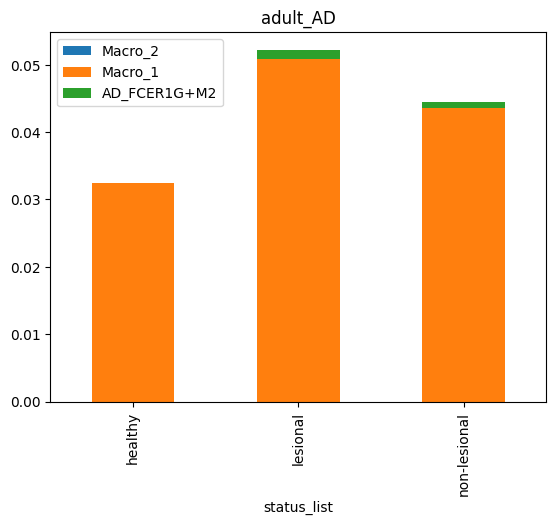

In [108]:
# plot sub
sub.plot(kind='bar', stacked=True)
plt.title(title)
plt.show()


In [94]:
# normalze so that the sum of each row is 1
grouped = grouped.div(grouped.sum(axis=1), axis=0)
# restructure the dataframe such that each row contains the group, the cell type and the value
grouped = grouped.reset_index().melt(id_vars='status', var_name='Cell type', value_name='Fraction')
grouped

,status,Cell type,Fraction
0,lesion: LS,Differentiated_KC,0.457476
1,lesion: N,Differentiated_KC,0.269140
2,lesion: NL,Differentiated_KC,0.325878
3,lesion: LS,Melanocyte,0.062075
4,lesion: N,Melanocyte,0.105416
...,...,...,...
67,lesion: N,Tc,0.002238
68,lesion: NL,Tc,0.002992
69,lesion: LS,ILC1,0.005067
70,lesion: N,ILC1,0.001868


In [95]:
import altair as alt

alt.renderers.enable('default')

# Create a new column that combines Fraction and Cell type
grouped['Text'] = grouped.apply(lambda row: f"{row['Cell type']}: {row['Fraction']:.2f}", axis=1)


# Base chart for the bars
bars = alt.Chart(grouped).mark_bar().encode(
    x=alt.X('status:N', title='Status'),
    y=alt.Y('Fraction:Q', stack='zero', title='Proportion'),
    color='Cell type:N',
    order=alt.Order('Cell type:N')
).properties(
    title=f'CibersortX: {title}',
    width=350,  # Set the width of the chart
    height=600  # Set the height of the chart
)

# Text annotations for cell types
text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-10,  # Adjust the position of the text
    color = 'black'  # Set the color of the text
).encode(
    text='Text:N'  # Use the new Text column for annotations
)


# Combine the bars and text annotations
chart = bars + text 
chart

alt.LayerChart(...)